In [1]:
import numpy as np
from matplotlib import pyplot as plt

## Derivation of Analytical Solution:

### For Exercise 1, we examine the case of a Simple Harmonic Oscillator in 1D:

$a = -x$

The general solution to this case is given by

$x(t) = A cos(t) + B sin(t)$

Where A and B are parameters determined by the initial conditions. For this exercise, the initial conditions are $x(0) = 1$ and $v(0) = 0$. This yields $A = 1$ and $B = 0$, so our analytical solution is given by

$x(t) = cos(t)$

In [2]:
#Using Euler's Method to solve this 2nd order ODE:

def Eulers_Step(r,f,h):
    #Single Step for Euler's method
    return(r+f*h)

def SHO_Eulers_Solve(h,a,b):
    #Specifically solves the SHO equation
    
    #initialize lists for v and x:
    x_list = []
    v_list = []
    
    #initial conditions:
    x = 1
    v = 0

    x_list.append(x)
    v_list.append(v)
    
    t_list = np.arange(a,b+h,h)
    
    for n in t_list:
        x = Eulers_Step(x,v,h)
        v = Eulers_Step(v,-x,h)
        x_list.append(x)
        v_list.append(v)
    return(x_list,v_list)

In [3]:
x_spec,v_spec = SHO_Eulers_Solve(2*(np.pi)/100,0,2*np.pi)

print("x(2pi):")
print(x_spec[-1])
print()
print("v(2pi):")
print(v_spec[-1])

x(2pi):
0.9999669652574441

v(2pi):
-0.06386428974622875


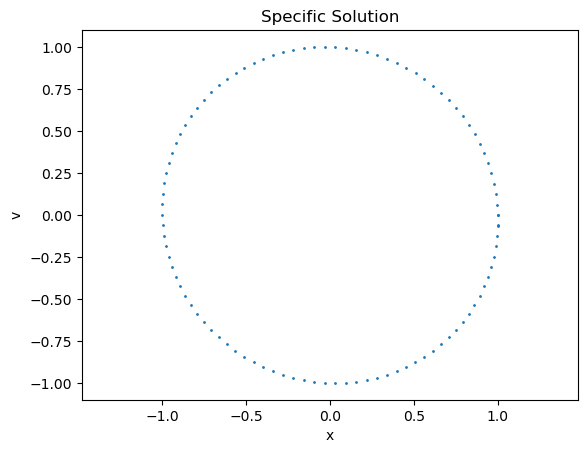

In [4]:
plt.scatter(x_spec,v_spec,s=1)
plt.title("Specific Solution")
plt.xlabel("x")
plt.ylabel("v")
plt.axis('equal');

In [5]:
#now an attempt at a more general solution

def f(r,t):
    #f will be specific to each problem.
    # for the case of the SHO, we return v and -x

    x = r[0]
    v = r[1]
    return(np.array([v,-x],float))

#this is the same step function as before
def Eulers_Step(r,f,t,h):
    #Single Step for Euler's method
    
    return(r+f(r,t)*h)


def Eulers_Solve(r_init,f,a,b,h):
    #arguments of r,f, start/stop interval, and time step
    
    t_list = np.arange(a,b+h,h)
    r_list = list([r_init])
    r = np.array(r_init)
    
    for t in t_list:
        #sets r (rather, r(t+h)) using the previous r(t) and appends to the list
        r = np.array(Eulers_Step(r,f,t,h))
        
        r_list.append(list(r))
        
    return(r_list,t_list)

In [6]:
r,t = Eulers_Solve([1,0],f,0,(2*np.pi),(2*np.pi)/100)

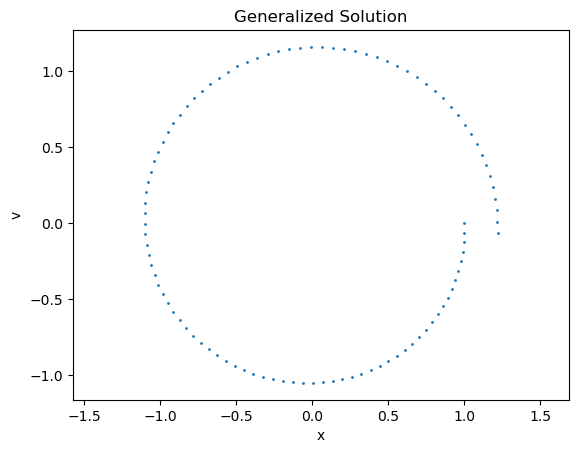

In [7]:
#constructing x and v arrays from solution
x_gen = []
v_gen = []
for i in r:
    x_gen.append(i[0])
    v_gen.append(i[1])

#and plotting...
plt.scatter(x_gen,v_gen,s=1)
plt.title("Generalized Solution")
plt.xlabel("x")
plt.ylabel("v")
plt.axis('equal');
plt.savefig("Glaze_ODE1_Phase.pdf")

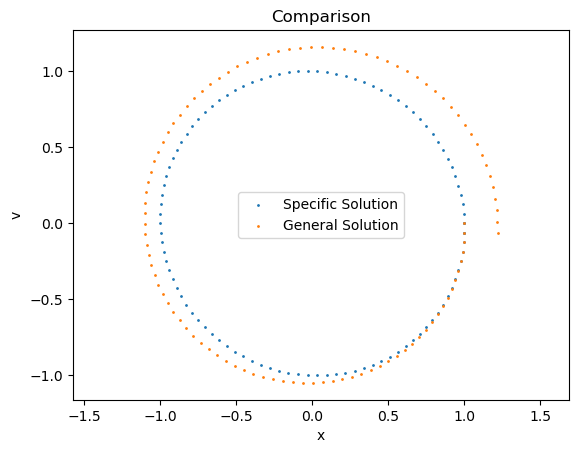

In [8]:
plt.scatter(x_spec,v_spec,s=1)
plt.scatter(x_gen,v_gen,s=1)
plt.title("Comparison")
plt.xlabel("x")
plt.ylabel("v")
plt.axis("equal")
plt.legend(["Specific Solution","General Solution"]);

In [9]:
print(v_gen[-1])
print(x_gen[-1])

-0.06646591687545853
1.2183379791835833


## Runge-Kutta


In [10]:
def rk4(r_init,f,a,b,h):
    #same arguments as Euler's method
    
    #same setup as Euler's method
    t_list = np.arange(a,b+h,h)
    r_list = list([r_init])
    r = np.array(r_init)
    
    for t in t_list:
        #defining k1, etc. according to the fourth order Runge-Kutta method
        k1 = np.array(h*f(r,t))
        k2 = np.array(h*f(r+k1/2,t+h/2))
        k3 = np.array(h*f(r+k2/2,t+h/2))
        k4 = np.array(h*f(r+k3,t+h))
        
        #continuting with defining r(t+h), same logic as Euler's...
        r = np.array(r + (k1 + 2*k2 + 2*k3 + k4)/6)
        
        r_list.append(list(r))
    
    return(r_list,t_list)

In [11]:
r,t = rk4([1,0],f,0,(2*np.pi),(2*np.pi)/30)

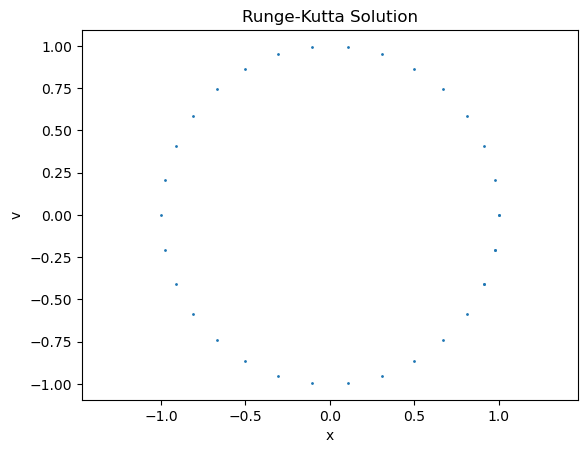

In [13]:
#constructing x and v arrays from solution
x_rk4 = []
v_rk4 = []
for i in r:
    x_rk4.append(i[0])
    v_rk4.append(i[1])

#and plotting...
plt.scatter(x_rk4,v_rk4,s=1)
plt.title("Runge-Kutta Solution")
plt.xlabel("x")
plt.ylabel("v")
plt.axis('equal');
plt.savefig("Glaze_ODE1_rk4Phase.pdf")

The step sizes used can be much smaller while still givng similar results. The above solution uses a step size of 2pi/30 and still shows the proper circular phase diagram.